In [1]:
#import preprocessing libraries
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

#import Analysis libraris
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score
from factor_analyzer import FactorAnalyzer

#import other libraries
from pandasql import sqldf


In [2]:
#open files
df_train=pd.read_csv("/Users/rynadalswyd/Documents/LEARN/Level 8/summer training/MSIT/path1_step6/Data-Science-Capstone-Projects-master/Project 1/train.csv")
df_test=pd.read_csv("/Users/rynadalswyd/Documents/LEARN/Level 8/summer training/MSIT/path1_step6/Data-Science-Capstone-Projects-master/Project 1/test.csv")

In [3]:
#discover the Data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [5]:
print("Train Data length =",len(df_train),"\n")
print("Test Data length =",len(df_test),)

Train Data length = 27321 

Test Data length = 11709


In [6]:
df_train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [7]:
df_test.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
UID,27321.0,257331.996303,21343.859725,220342.0,238816.000000,257220.000000,275818.000000,294334.00000
BLOCKID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUMLEVEL,27321.0,140.000000,0.000000,140.0,140.000000,140.000000,140.000000,140.00000
COUNTYID,27321.0,85.646426,98.333097,1.0,29.000000,63.000000,109.000000,840.00000
STATEID,27321.0,28.271806,16.392846,1.0,13.000000,28.000000,42.000000,72.00000
...,...,...,...,...,...,...,...,...
pct_own,27053.0,0.640434,0.226640,0.0,0.502780,0.690840,0.817460,1.00000
married,27130.0,0.508300,0.136860,0.0,0.425102,0.526665,0.605760,1.00000
married_snp,27130.0,0.047537,0.037640,0.0,0.020810,0.038840,0.065100,0.71429
separated,27130.0,0.019089,0.020796,0.0,0.004530,0.013460,0.027488,0.71429


In [9]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
UID,11709.0,257525.004783,21466.372658,220336.0,238819.00000,257651.00000,276300.000000,294333.00000
BLOCKID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUMLEVEL,11709.0,140.000000,0.000000,140.0,140.00000,140.00000,140.000000,140.00000
COUNTYID,11709.0,85.710650,99.304334,1.0,29.00000,61.00000,109.000000,810.00000
STATEID,11709.0,28.489196,16.607262,1.0,13.00000,28.00000,42.000000,72.00000
...,...,...,...,...,...,...,...,...
pct_own,11587.0,0.634194,0.232232,0.0,0.49250,0.68764,0.815235,1.00000
married,11625.0,0.505632,0.139774,0.0,0.42202,0.52527,0.605660,1.00000
married_snp,11625.0,0.047960,0.038693,0.0,0.02089,0.03868,0.065340,0.71429
separated,11625.0,0.019346,0.021428,0.0,0.00450,0.01387,0.027910,0.71429


In [10]:
#[UID] (User IDentification) is most likely to be a unique key and not [primary]  since all its inputs have same value (tract)
df_train['primary'].value_counts().sort_values(ascending=False)
df_train['UID'].value_counts().sort_values(ascending=False)
df_train.set_index(keys=['UID'],inplace=True)
df_test.set_index(keys=['UID'],inplace=True)

In [11]:
df_train.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [12]:
df_test.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [13]:
#train -- percantage of missing values (if high drop that column)
missing_train=df_train.isnull().sum() *100/len(df_train)
missing_df_train=pd.DataFrame(missing_train,columns=['missed %'])
missing_df_train.sort_values(by=['missed %'],inplace=True,ascending=False)
missing_df_train[missing_df_train['missed %'] >0]

,missed %
BLOCKID,100.000000
hc_samples,2.196113
hc_mean,2.196113
hc_median,2.196113
hc_stdev,2.196113
hc_sample_weight,2.196113
hc_mortgage_mean,2.097288
hc_mortgage_stdev,2.097288
hc_mortgage_sample_weight,2.097288
hc_mortgage_samples,2.097288


In [14]:
#test -- percantage of missing values (if high drop that column)
missing_test=df_test.isnull().sum() *100/len(df_train)
missing_df_test=pd.DataFrame(missing_test,columns=['missed %'])
missing_df_test.sort_values(by=['missed %'],inplace=True,ascending=False)
missing_df_test[missing_df_test['missed %'] >0]

,missed %
BLOCKID,42.857143
hc_samples,1.061455
hc_mean,1.061455
hc_median,1.061455
hc_stdev,1.061455
hc_sample_weight,1.061455
hc_mortgage_mean,0.980930
hc_mortgage_stdev,0.980930
hc_mortgage_sample_weight,0.980930
hc_mortgage_samples,0.980930


In [15]:
#[BLOCKID]  has no values in train  and  high missed values in test 
df_train.drop(columns=['BLOCKID'],inplace=True) 
df_test.drop(columns=['BLOCKID'],inplace=True) 

In [16]:
#train - check if non numric columns have missing values
df_train.isna().sum()[:11]

SUMLEVEL     0
COUNTYID     0
STATEID      0
state        0
state_ab     0
city         0
place        0
type         0
primary      0
zip_code     0
area_code    0
dtype: int64

In [17]:
#test - check if non numric columns have missing values
df_test.isna().sum()[:11]

SUMLEVEL     0
COUNTYID     0
STATEID      0
state        0
state_ab     0
city         0
place        0
type         0
primary      0
zip_code     0
area_code    0
dtype: int64

In [18]:
#use mean for all the missing values
#train
print("Train SET: ")
for col in df_train.columns:
    if df_train[col].isna().sum() !=0:
        df_train[col].replace(np.nan, df_train[col].mean(),inplace=True)
        print(col,df_train[col].isna().sum()) #last check
print("\n\nTest SET: ")
#test
for col in df_test.columns:
    if df_test[col].isna().sum() !=0:
        df_test[col].replace(np.nan, df_test[col].mean(),inplace=True)
        print(col,df_test[col].isna().sum()) #last check

Train SET: 
rent_mean 0
rent_median 0
rent_stdev 0
rent_sample_weight 0
rent_samples 0
rent_gt_10 0
rent_gt_15 0
rent_gt_20 0
rent_gt_25 0
rent_gt_30 0
rent_gt_35 0
rent_gt_40 0
rent_gt_50 0
hi_mean 0
hi_median 0
hi_stdev 0
hi_sample_weight 0
hi_samples 0
family_mean 0
family_median 0
family_stdev 0
family_sample_weight 0
family_samples 0
hc_mortgage_mean 0
hc_mortgage_median 0
hc_mortgage_stdev 0
hc_mortgage_sample_weight 0
hc_mortgage_samples 0
hc_mean 0
hc_median 0
hc_stdev 0
hc_samples 0
hc_sample_weight 0
home_equity_second_mortgage 0
second_mortgage 0
home_equity 0
debt 0
second_mortgage_cdf 0
home_equity_cdf 0
debt_cdf 0
hs_degree 0
hs_degree_male 0
hs_degree_female 0
male_age_mean 0
male_age_median 0
male_age_stdev 0
male_age_sample_weight 0
male_age_samples 0
female_age_mean 0
female_age_median 0
female_age_stdev 0
female_age_sample_weight 0
female_age_samples 0
pct_own 0
married 0
married_snp 0
separated 0
divorced 0


Test SET: 
rent_mean 0
rent_median 0
rent_stdev 0
rent_sa

In [19]:
query = "select place,pct_own,second_mortgage,lat,lng from df_train where pct_own >0.10 and second_mortgage <0.5 order by second_mortgage DESC LIMIT 2500;"
pysqldf = lambda query_: sqldf(query_, globals())
location_mort_pct_train=pysqldf(query)
location_mort_pct_train.head()

,place,pct_own,second_mortgage,lat,lng
0,Worcester City,0.20247,0.43363,42.254262,-71.800347
1,Harbor Hills,0.15618,0.31818,40.751809,-73.853582
2,Glen Burnie,0.22380,0.30212,39.127273,-76.635265
3,Egypt Lake-leto,0.11618,0.28972,28.029063,-82.495395
4,Lincolnwood,0.14228,0.28899,41.967289,-87.652434


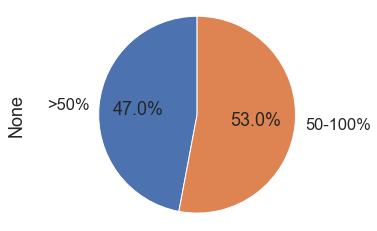

In [20]:
df_train['bad_debt']=df_train['second_mortgage']+df_train['home_equity']-df_train['home_equity_second_mortgage']
df_train['bins'] = pd.cut(df_train['bad_debt'],bins=[0,0.10,1], labels=[">50%","50-100%"])
df_train.groupby(['bins']).size().plot(kind='pie',subplots=True,startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [21]:
df_train.columns

Index(['SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_de

In [22]:
df_train['city']

UID
267822       Hamilton
246444     South Bend
245683       Danville
279653       San Juan
247218      Manhattan
             ...     
279212          Coamo
277856      Blue Bell
233000        Weldona
287425    Colleyville
265371      Las Vegas
Name: city, Length: 27321, dtype: object

In [23]:
Danville=df_train.loc[df_train['city'] == 'Danville']
San_Juan=df_train.loc[df_train['city'] == 'San Juan']
Hamilton=df_train.loc[df_train['city'] == 'Hamilton']
df_box_city=pd.concat([Danville,San_Juan,Hamilton])
df_box_city.head(4)

,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,...,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,bins
UID,,,,,,,,,,,,,,,,,,,,,
245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,46122,...,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,0.09512,>50%
247609,140,21,21,Kentucky,KY,Danville,Danville City,City,tract,40422,...,23.84663,539.05409,2278.0,0.56356,0.52335,0.07005,0.06319,0.18819,0.14257,50-100%
290135,140,590,51,Virginia,VA,Danville,Danville City,Town,tract,24541,...,26.07239,291.78139,1274.0,0.37571,0.44628,0.12672,0.11983,0.14325,0.16138,50-100%
290144,140,590,51,Virginia,VA,Danville,Danville City,Town,tract,24541,...,22.31305,368.31693,1548.0,0.71668,0.60965,0.01693,0.00423,0.11516,0.11165,50-100%


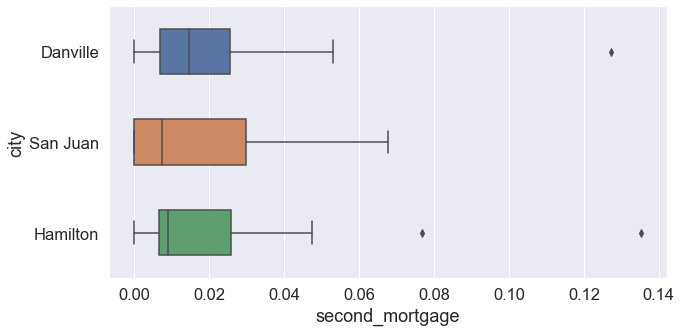

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='second_mortgage', y='city',width=0.5)
plt.show()

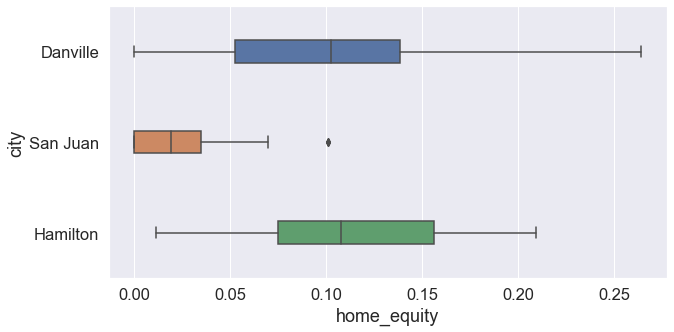

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='home_equity', y='city',width=0.25)
plt.show()

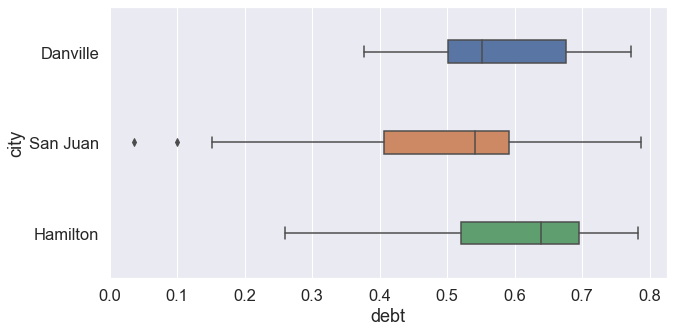

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='debt', y='city',width=0.25)
plt.show()

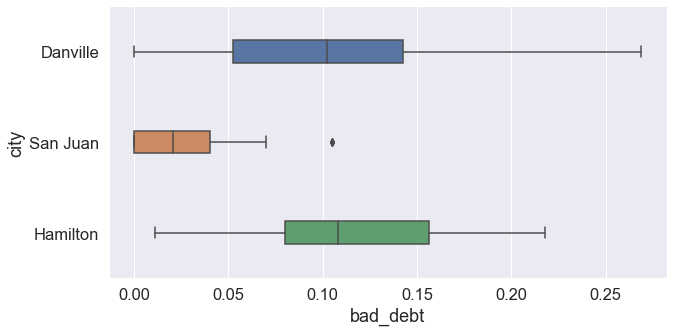

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='bad_debt', y='city',width=.25)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


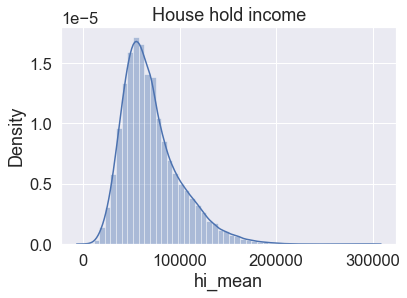

In [28]:
sns.distplot(df_train['hi_mean'])
plt.title('House hold income')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


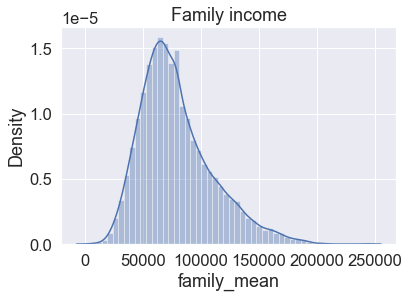

In [29]:
sns.distplot(df_train['family_mean'])
plt.title('Family income')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


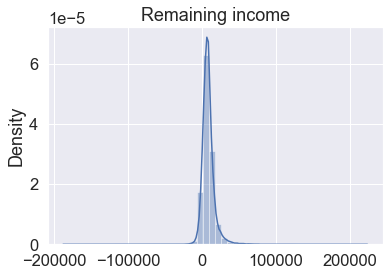

In [30]:
sns.distplot(df_train['family_mean']-df_train['hi_mean'])
plt.title('Remaining income')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

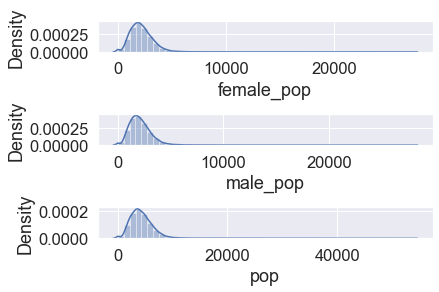

In [31]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1)
sns.distplot(df_train['female_pop'],ax=ax1)
sns.distplot(df_train['male_pop'],ax=ax2)
sns.distplot(df_train['pop'],ax=ax3)
plt.subplots_adjust(wspace=1,hspace=2)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


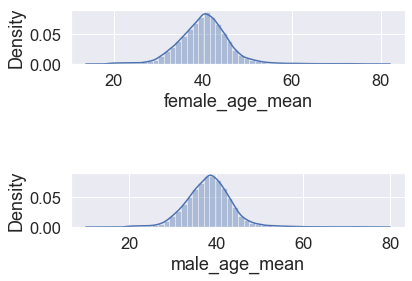

In [32]:
fig,(ax1,ax2)=plt.subplots(2,1)
sns.distplot(df_train['female_age_mean'],ax=ax1)
sns.distplot(df_train['male_age_mean'],ax=ax2)
plt.subplots_adjust(wspace=1,hspace=2)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


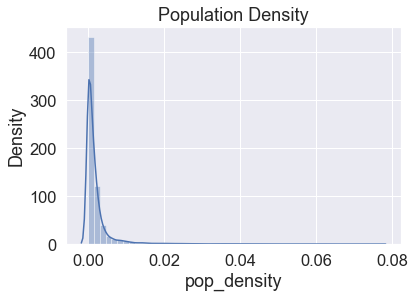

In [33]:
df_train['pop_density']=df_train['pop']/df_train['ALand']
df_test['pop_density']=df_test['pop']/df_test['ALand']
sns.distplot(df_train['pop_density'])
plt.title('Population Density')
plt.show() #graph show that there is a less density 

In [34]:
#create a new field called median age
df_train['age_median']=(df_train['male_age_median']+df_train['female_age_median'])/2
df_test['age_median']=(df_test['male_age_median']+df_test['female_age_median'])/2

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


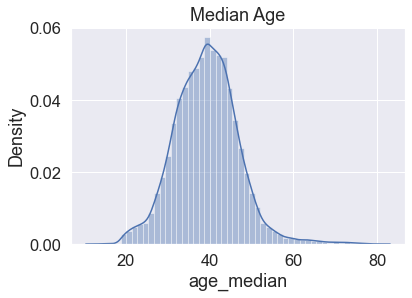

In [35]:
#Visualize the findings using appropriate chart type
sns.distplot(df_train['age_median'])
plt.title('Median Age')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


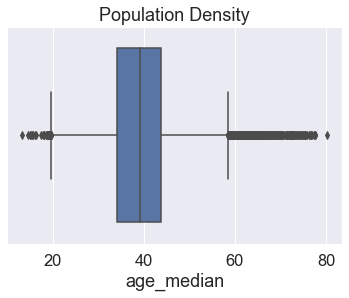

In [36]:
sns.boxplot(df_train['age_median'])
plt.title('Population Density')
plt.show() 

In [37]:
df_train['pop_bins']=pd.cut(df_train['pop'],bins=5,labels=['very small','small','medium','high','very high'])
df_train['pop_bins'].value_counts()

very small    27058
small           246
medium            9
high              7
very high         1
Name: pop_bins, dtype: int64

In [38]:
df_train.groupby(by='pop_bins')[['married','separated','divorced']].count()

,married,separated,divorced
pop_bins,,,
very small,27058,27058,27058
small,246,246,246
medium,9,9,9
high,7,7,7
very high,1,1,1


In [39]:
df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean", "median"])

married           separated            divorced          
                mean    median      mean    median      mean    median
pop_bins                                                              
very small  0.507548  0.524680  0.019126  0.013650  0.100504  0.096020
small       0.584894  0.593135  0.015833  0.011195  0.075348  0.070045
medium      0.655737  0.618710  0.005003  0.004120  0.065927  0.064890
high        0.503359  0.335660  0.008141  0.002500  0.039030  0.010320
very high   0.734740  0.734740  0.004050  0.004050  0.030360  0.030360

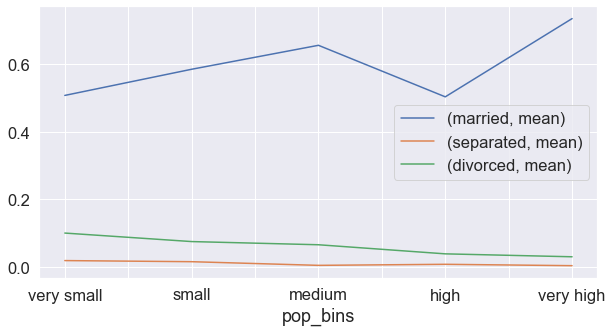

In [40]:
pop_bin_married=df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin_married.plot(figsize=(10,5))
plt.legend(loc='best')
plt.show()

In [41]:
#overall level rent as a percentage of income
sum(df_train['rent_mean'])/sum(df_train['family_mean'])

0.013358170721473864

In [42]:
rent_state_mean=df_train.groupby(by='state')['rent_mean'].agg(["mean"])
income_state_mean=df_train.groupby(by='state')['family_mean'].agg(["mean"])
rent_perc_of_income=rent_state_mean['mean']/income_state_mean['mean']*100
rent_perc_of_income.head()

state
Alabama       1.154713
Alaska        1.286963
Arizona       1.497041
Arkansas      1.113123
California    1.678314
Name: mean, dtype: float64

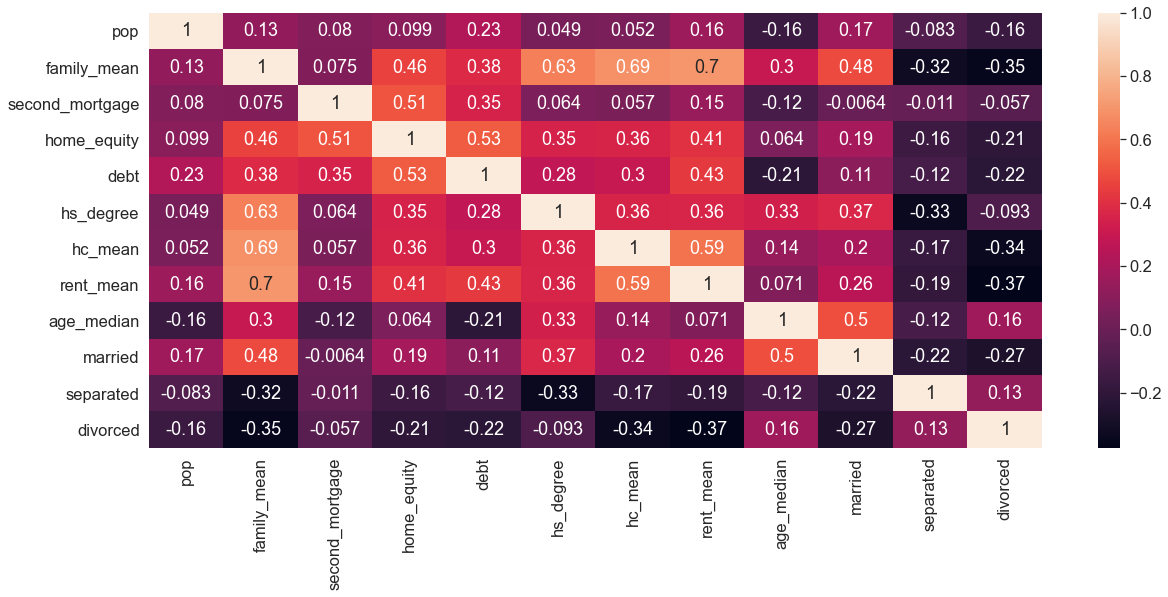

In [43]:
df_train.columns
cor=df_train[['pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree','hc_mean','rent_mean',
           'age_median', 'married','separated', 'divorced']].corr()
plt.figure(figsize=(20,8))
sns.heatmap(cor,annot=True)
plt.show()
#there is a high corrlation between family mean income and the precetage of people graduated from high school
#there is a high corrlation between family mean income and The mean Monthly Owner Costs of specified geographic location
#there is a high corrlation between family mean income and rent mean

In [44]:
fa=FactorAnalyzer(n_factors=5)
fa.fit_transform(df_train.select_dtypes(exclude= ('object','category')))
fa.loadings_

/opt/anaconda3/lib/python3.8/site-packages/factor_analyzer/utils.py:91: RuntimeWarning: invalid value encountered in true_divide
  x = (x - x.mean(0)) / x.std(0)


ValueError: array must not contain infs or NaNs

In [45]:
df_train['type'].unique()
type_dict={'type':{'City':1, 
                   'Urban':2, 
                   'Town':3, 
                   'CDP':4, 
                   'Village':5, 
                   'Borough':6}
          }
df_train.replace(type_dict,inplace=True)
df_test.replace(type_dict,inplace=True)
df_train['type'].unique() #check
df_test['type'].unique() #check

array([4, 1, 6, 3, 5, 2])

In [46]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']
x_train=df_train[feature_cols]
y_train=df_train['hc_mortgage_mean']
x_test=df_test[feature_cols]
y_test=df_test['hc_mortgage_mean']

In [47]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [48]:
linereg=LinearRegression()
linereg.fit(x_train_scaled,y_train)
y_pred=linereg.predict(x_test_scaled)
print("R2 = ", r2_score(y_test,y_pred))
print("RMSE = ", np.sqrt(mean_squared_error(y_test,y_pred)))

R2 =  0.7348210754610929
RMSE =  323.1018894984635
